In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from collections import Counter
from collections import defaultdict
import seaborn as sns

### Obtaining All Names (gg)

In [2]:
#Web scraping the wikia for Genshin's playable character list.

urlnames_gg = "https://genshin.gg/"

pagenames_gg = requests.get(urlnames_gg)

soupname_gg = BeautifulSoup(pagenames_gg.text, "html.parser")

In [3]:
#Scraping through to get the html, identifying which class and identifier to find the names

imgtag_gg = soupname_gg.find_all("h2", class_= "character-name")
#imgtag_gg

In [4]:
characters_gg = [element.get_text() for element in imgtag_gg]
#characters

def process_names(names_list):
    return [name.replace(" ", "").lower() for name in names_list]

characters_gg = process_names(characters_gg)
characters_gg = sorted(characters_gg)

print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'ayaka', 'ayato', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'childe', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'heizou', 'hutao', 'itto', 'jean', 'kaeya', 'kaveh', 'kazuha', 'keqing', 'kirara', 'klee', 'kokomi', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sara', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli']


### Tidying Up Names

In [5]:
remove_gg = ["itto", "kazuha", "heizou", "sara", "childe", "ayato", "ayaka", "kokomi"]


characters_gg = [item for item in characters_gg if item not in remove_gg]
characters_gg = characters_gg + remove_gg
print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'hutao', 'jean', 'kaeya', 'kaveh', 'keqing', 'kirara', 'klee', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli', 'itto', 'kazuha', 'heizou', 'sara', 'childe', 'ayato', 'ayaka', 'kokomi']


### Scraping Constellation Data

In [6]:
#Web Scraping Constellation Data from Genshin.gg - Complete

characters_gg_test = characters_gg[2:5]
cons_full = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full.append(notext)

In [7]:
#cons_full

# Data Retry, with g8 instead of wk

In [8]:
url_g8 = "https://game8.co/games/Genshin-Impact/archives/307054"

In [9]:
#page_chara_g8 = requests.get(url_g8)
#soup_chara_g8 = BeautifulSoup(page_chara_g8.content, "html.parser")
#soup_chara_g8.find_all("a")
#pandas_table_g8[9]

In [10]:
#Using the Built-in Pandas html reader

pandas_table_g8 = pd.read_html(url_g8)

# COMPLETE NAME SCRAPING WITH RELEASE DATES

In [11]:
url_g8 = "https://game8.co/games/Genshin-Impact/archives/307054"


#Using the Built-in Pandas html reader
pandas_table_g8 = pd.read_html(url_g8)

dates_full_g8 = pandas_table_g8[7]        #Selecting the correct table with the release date from the scrape

#Removing the irrelevant data
dates_full_g8 = dates_full_g8.drop(columns = ['Element'])
dates_full_g8 = dates_full_g8.dropna()

#Sorting values
dates_full_g8 = dates_full_g8.sort_values(by = ["Character"], axis = 0)
dates_full_g8.reset_index(drop=True, inplace=True)


#Fixing Aloy and Childe - specific characters with unique issues with the naming and release date conventions
dates_full_g8.loc[2, 'Release Date'] = "10/13/2021"
dates_full_g8.loc[44, 'Character'] = "childe"

#Fixing Rarity Tag
dates_full_g8['Rarity'] = dates_full_g8['Rarity'].str.replace(r'★ (\d+)', r'\1star', regex=True)    #use Regex

#Fixing Release Date
dates_full_g8['Release Date'] = pd.to_datetime(dates_full_g8['Release Date'])

#print(dates_full_g8)



#Converting character names into simpler format and obtaining information on missing ("Day One") Characters
characters_g8 = dates_full_g8['Character'].tolist()
characters_g8 = [x.lower() for x in characters_g8]        #Similar to previous action with gg
characters_g8 = process_names(characters_g8)        #Use Previous function to remove spaces

#print(len(characters_g8))
#print(characters_g8)



#Listing out Missing Characters, comparing complete set from gg and the incomplete from g8
characters_gg_g8 = list(set(characters_gg) - set(characters_g8))

#print(characters_gg_g8)



#Isolating Day 1 Characters into g8
characters_gg_g8 = list(set(characters_gg_g8) - set('kukishinobu'))    #kukishinobu will be added back later

#print(characters_gg_g8)



#Creating 5star (legendary) and 4star (epic) dataframes for concatenation
Legendary = ['diluc', 'jean', 'traveler(geo)', 'traveler(electro)', 
             'traveler(hydro)','traveler(anemo)', 'traveler(dendro)', 
             'qiqi', 'mona', 'keqing']
Epic = list(set(characters_gg_g8) - set(Legendary))        #Manual action is listing Day One Legendary characters



#Converting Epic list into DataFrame
df_Epic = pd.DataFrame(Epic, columns=['Character'])
df_Epic['Rarity'] = '4star'
df_Epic['Release Date'] = '2020/9/28'
df_Epic['Release Date'] = pd.to_datetime(df_Epic['Release Date'])

kuki = pd.DataFrame([{'Character': 'kukishinobu',         #Adding back kukishinobu manually
                      'Rarity': '4star', 
                      'Release Date': '21/6/2022'}])
kuki['Release Date'] = pd.to_datetime(kuki['Release Date'])


df_Epic = pd.concat([df_Epic, kuki])
df_Epic.reset_index(drop = True, inplace = True)

#print(df_Epic)



#Converting Legendary list into DataFrame
df_Legend = pd.DataFrame(Legendary, columns=['Character'])
df_Legend['Rarity'] = '5star'
df_Legend['Release Date'] = '2020/9/28'
df_Legend['Release Date'] = pd.to_datetime(df_Epic['Release Date'])

#print(df_Legend)



#Combining the 5s and 4s dataframes for the Day One Characters (and kukishinobu)
df_Day1 = pd.concat([df_Epic, df_Legend])
df_Day1.reset_index(drop = True, inplace = True)

#print(df_Day1)



#Combining the Day One Characters with the Initial dates_full_g8 Frame
dates_full_g8 = pd.concat([dates_full_g8, df_Day1])
dates_full_g8.reset_index(inplace = True, drop = True)

In [12]:
print(len(dates_full_g8))
#dates_full_g8

86


In [13]:
characters_g8 = dates_full_g8['Character'].tolist()
characters_g8 = [x.lower() for x in characters_g8]
characters_g8 = process_names(characters_g8)

#print(len(characters_g8))
#characters_g8

In [14]:
#Web Scraping Constellation Data from Genshin.gg - Complete

characters_gg_test = characters_g8#[0:60]
cons_full_g8 = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full_g8.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full_g8.append(notext)

In [15]:
len(cons_full_g8)

#cons_full_g8

86

In [16]:
dates_full_g8['Constellation Description'] = cons_full_g8
dates_full_g8

,Release Date,Character,Rarity,Constellation Description
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni..."
2,2021-10-13,Aloy,5star,This character has no constellations.
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...
...,...,...,...,...
81,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...
82,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi..."
83,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...
84,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...


In [17]:
#Generating a simple word count from the constellation descriptions.

List_count_g8 = []

for paragraph in cons_full_g8:
    words = paragraph.split()
    word_count = sum(Counter(words).values())
    List_count_g8.append(word_count)

print(List_count_g8)
len(List_count_g8)

[141, 252, 5, 138, 121, 167, 143, 196, 224, 303, 205, 255, 242, 136, 160, 121, 180, 123, 338, 116, 146, 193, 155, 188, 164, 121, 149, 219, 125, 175, 230, 100, 149, 172, 234, 240, 236, 183, 171, 96, 111, 193, 135, 5, 143, 110, 149, 119, 271, 358, 263, 106, 109, 106, 102, 201, 155, 135, 84, 106, 129, 66, 111, 116, 86, 142, 112, 111, 93, 145, 120, 106, 117, 92, 108, 145, 139, 110, 124, 123, 180, 80, 126, 102, 165, 137]


86

In [18]:
dates_full_g8['Word Count'] = List_count_g8
dates_full_g8

,Release Date,Character,Rarity,Constellation Description,Word Count
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...,141
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni...",252
2,2021-10-13,Aloy,5star,This character has no constellations.,5
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...,138
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...,121
...,...,...,...,...,...
81,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...,80
82,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi...",126
83,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...,102
84,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...,165


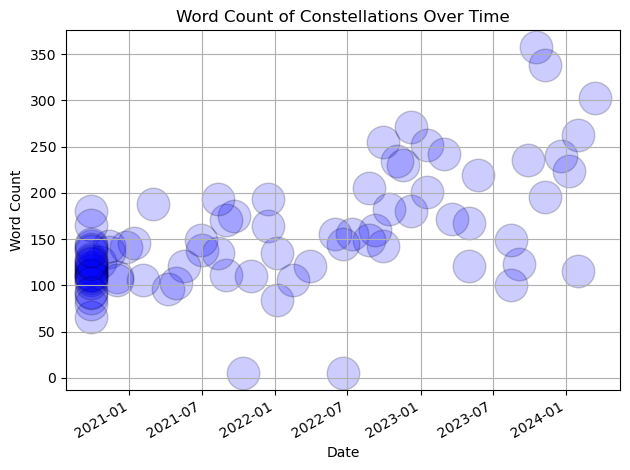

In [19]:
#Creating plots with the new data frame.

dates_full_g8.plot.scatter(x='Release Date', y='Word Count', color='blue',
                 marker='o', edgecolor='black', alpha = 0.20, s=550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()